# 4- Validation

In [203]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [204]:
#start with our first dataset
df1_modeling= pd.read_csv('df1_modeling.csv')
df1_modeling.head(2)

,test_time,motor_UPDRS,total_UPDRS,Jitter,Jitter_Abc,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810


In [205]:
df1_modeling.describe()

,test_time,motor_UPDRS,total_UPDRS,Jitter,Jitter_Abc,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [206]:
# create X (features) and y (response)
X = df1_modeling.drop(['total_UPDRS'], axis=1)
y = df1_modeling['total_UPDRS']

In [207]:
X.shape

(5875, 18)

# Feature Selection

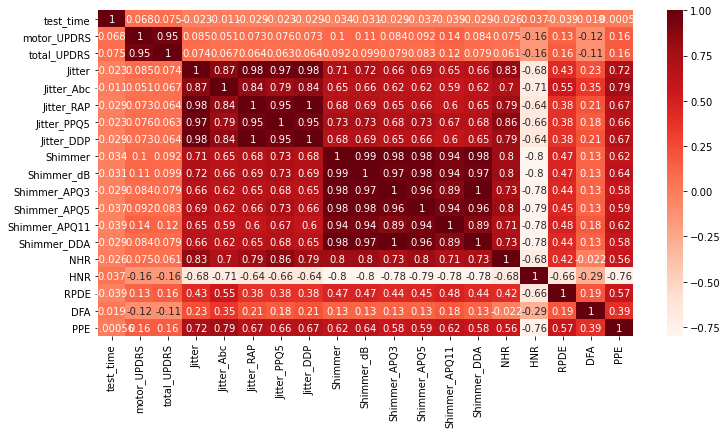

In [243]:
#Using Pearson Correlation

plt.figure(figsize=(12,6))
sns.heatmap(df1_modeling.corr(method='pearson'), annot=True, cmap='Reds');
plt.savefig('heatmap_model1.jpg', dpi=300)

In [244]:
#simple code to show our high correlations
cor = abs(df1_modeling.corr()['total_UPDRS'])

#Selecting highly correlated features

relevant_features = cor[cor>0.1]
relevant_features

motor_UPDRS      0.947231
total_UPDRS      1.000000
Shimmer_APQ11    0.120838
HNR              0.162117
RPDE             0.156897
DFA              0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

In [245]:
#reassign my X
X=df1_modeling[['motor_UPDRS', 'Shimmer_APQ11','HNR','RPDE','DFA','PPE']]

Those are the feature that we will use.

In [246]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [247]:
#print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(4112, 6)
(1763, 6)


In [248]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(4112,)
(1763,)


In [249]:
# using CV
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)

rfr_folds = KFold(n_splits = 5, shuffle = True, random_state = 2350)

scores = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=rfr_folds).mean()

print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9947006277140272
0.96663381124561


In [251]:
predict=rfr.predict(X_test)
predict

array([26.55149, 25.0617 , 21.01997, ..., 31.13336, 25.77738, 25.14031])

In [252]:
#mean squared error 
#root mean squared error 
mse = sklearn.metrics.mean_squared_error(y_test, predict)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse))

Accuracy for Random Forest 198.66217718390197


let's move on to validate our second model

In [253]:
#moving on to  our second dataset
df2_modeling= pd.read_csv('df2_modeling.csv')
df2_modeling.head(2)

,test_time,motor_UPDRS,total_UPDRS,Jitter,Jitter_Abc,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810


In [254]:
# create X (features) and y (response)
X2 = df2_modeling.drop(['motor_UPDRS'], axis=1)
y2 = df2_modeling['motor_UPDRS']
#reassign my X
X2=df2_modeling[['total_UPDRS', 'Shimmer_APQ11','HNR','RPDE','DFA','PPE']]

In [255]:
#split X and y into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [256]:
#using CV
rfr2 = RandomForestRegressor()

rfr2.fit(X_train2,y_train2)

rfr_folds2 = KFold(n_splits = 5, shuffle = True, random_state = 2350)

scores2 = cross_val_score(rfr, X_train2, y_train2, scoring='r2', cv=rfr_folds2).mean()

print(rfr2.score(X_train2,y_train2))
print(rfr2.score(X_test2,y_test2))

0.9951008710172824
0.9688578841227623


In [257]:
predict2=rfr2.predict(X_test2)

In [258]:
#mean squared error 
#root mean squared error 
mse2 = sklearn.metrics.mean_squared_error(y_test, predict)
rmse2 = math.sqrt(mse2)
print('Accuracy for Random Forest',100*max(0,rmse2))

Accuracy for Random Forest 198.66217718390197


# 5-modeling

# Training Model


In [259]:
#scaling our featurs
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=100)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [261]:
#we will be using two models 

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=95, max_depth=20, max_leaf_nodes=2000,random_state=2350)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#fiting our two models
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)



LinearRegression()

# Predict total Updrs

In [262]:
#predicting our respons
pred_RandomForest=rfr.predict(X_test)
pred_LinearRegression=lr.predict(X_test)

In [263]:
score1 = metrics.r2_score(y_test, pred_RandomForest)
score2 = metrics.r2_score(y_test, pred_LinearRegression)

print(score1)
print(score2)

0.9701640357375736
0.8998843114883202


As we can see Random Forest gives better results

# second: predict motor Updrs

In [264]:
#moving on to  our second dataset
df2_modeling= pd.read_csv('/Users/lamaayash/df2_modeling.csv')
df2_modeling.head(2)

,test_time,motor_UPDRS,total_UPDRS,Jitter,Jitter_Abc,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810


In [265]:
df2_modeling.describe()

,test_time,motor_UPDRS,total_UPDRS,Jitter,Jitter_Abc,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [266]:
# create X (features) and y (response)
X2 = df2_modeling.drop(['motor_UPDRS'], axis=1)
y2 = df2_modeling['motor_UPDRS']

In [267]:
X2.shape

(5875, 18)

In [268]:
y2.shape

(5875,)

# Feature Selection

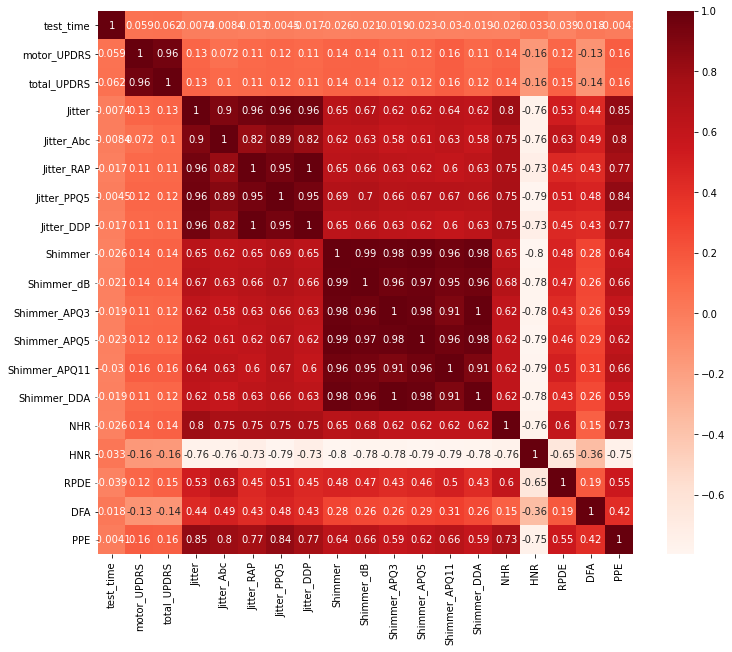

<Figure size 432x288 with 0 Axes>

In [269]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))

sns.heatmap(df2_modeling.corr(method='spearman'), annot=True, cmap='Reds')
plt.show()
plt.savefig('heatmap_model2.jpg', dpi=300)

In [270]:
#Correlation with output variable
cor_target = abs(df1_modeling.corr()['motor_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

motor_UPDRS      1.000000
total_UPDRS      0.947231
Shimmer          0.102349
Shimmer_dB       0.110076
Shimmer_APQ11    0.136560
HNR              0.157029
RPDE             0.128607
DFA              0.116242
PPE              0.162433
Name: motor_UPDRS, dtype: float64

In [271]:
#reassign my X
X2=df1_modeling[['total_UPDRS', 'Shimmer_APQ11','HNR','RPDE','DFA','PPE']]

In [272]:
sc_x2 = StandardScaler()
sc_y2 = StandardScaler()
X2 = sc_x.fit_transform(X2)

In [273]:
#resplit my dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.15, random_state=0)
sc_X2 = StandardScaler()
X_train2 = sc_X2.fit_transform(X_train2)
X_test2 = sc_X2.transform(X_test2)

In [274]:
#we will be using two models 
rfr2=RandomForestRegressor(n_estimators=95, max_depth=20, max_leaf_nodes=2000,random_state=2350)

#using linear regression

lr2= LinearRegression()




rfr2.fit(X_train2, y_train2)
lr2.fit(X_train2, y_train2)

LinearRegression()

# Predict motor Updrs

In [275]:
#predicting our respons

pred_RandomForest2=rfr2.predict(X_test2)
pred_LinearRegression2=lr2.predict(X_test2)

In [276]:

score3 = metrics.r2_score(y_test2, pred_RandomForest2)

score4 = metrics.r2_score(y_test2, pred_LinearRegression2)


print(score3)
print(score4)

0.9635582969759899
0.8968838483541663


As we can see Random Forest gives better results as well

# Thank you .